In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_theme(style="whitegrid")

# Create charts directory if not exists
os.makedirs("charts", exist_ok=True)



In [3]:
# Load fake time-off data
df = pd.read_csv("time_off_data.csv", parse_dates=["date"])

# Add derived columns
df["month"] = df["date"].dt.to_period("M").dt.to_timestamp()
df["year"] = df["date"].dt.year

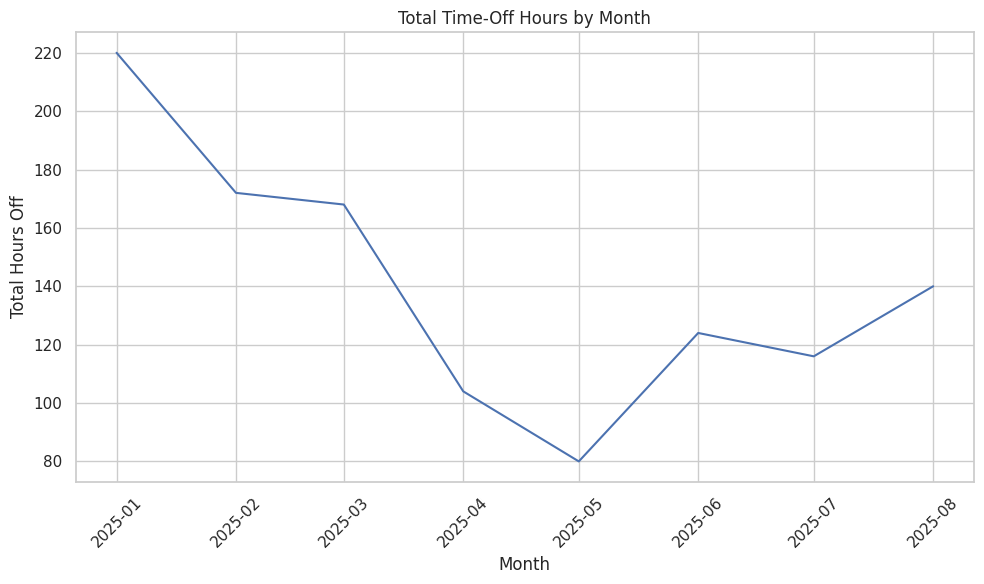

In [5]:

monthly_totals = df.groupby("month")["hours"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_totals, x="month", y="hours", markers='o')
plt.title("Total Time-Off Hours by Month")
plt.xlabel("Month")
plt.ylabel("Total Hours Off")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("charts/time_off_by_month.png")
plt.show()